In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
def sign(x):
    i = 1 if x > 0 else 0 if x == 0 else -1
    return i

#create target function
def targetFunction():
    randomPts = np.random.uniform(-1,1,(2,2))
    y1, y2 = np.min(randomPts[:,1]), np.max(randomPts[:,1])
    x1, x2 = np.min(randomPts[:,0]), np.max(randomPts[:,0])
    lineSlope = (y2 - y1)/(x2 - x1)
    b = y2 - x2*lineSlope
    
    return lineSlope, b

#assign labels to examples using target function weights
def createLabels(X, w0, w1):
    Y = X[:,1] - w1*X[:,0] - w0
    Y = np.array([sign(i) for i in Y]).reshape(-1,1)
    return Y

def generateData(n, w0, w1):
    x = np.random.uniform(-1,1,(n,2))
    labels = createLabels(x, w0, w1)
    x = np.hstack((np.ones((x.shape[0],1)), x))
    return x, labels

def crossEntropyError(x,y,w):
    return np.log(1+np.exp(-y*w.dot(x)))

crossEntropyErrorVec = np.vectorize(crossEntropyError, otypes=[np.float])

def derivativeCrossEntropy(x,y,w):
    return (-y*x)/(1+np.exp(y*w.dot(x)))

def SGD(data, labels):
    epoch = 0
    previousW = np.zeros((1,data.shape[1])).flatten()
    while True:
        epoch += 1
        w = np.zeros((1,data.shape[1])).flatten()
        tempW = previousW.copy()
        indexes = np.random.permutation(data.shape[0])
        for i in indexes:
            w = tempW - 0.01*derivativeCrossEntropy(data[i], labels[i], tempW)
            tempW = w.copy()
        if np.linalg.norm(previousW - tempW) < 0.01:
            break
        previousW = tempW.copy()
    return epoch, previousW
        
def calculateEout(data, labels, w):
    e = 0
    for d in zip(data,labels):
        e += crossEntropyError(d[0], d[1], w)
    return e/data.shape[0]

In [6]:
def runSGD():
    w1, w0 = targetFunction()
    X,Y = generateData(100, w0, w1)
    epoch, wSGD = SGD(X, Y)
    testData, testLabels = generateData(1000, w0, w1)
    eout = calculateEout(testData, testLabels, wSGD)
    return epoch, eout, wSGD

def logisticFunction(x, w):
    s = w.dot(x.T)
    return np.exp(s)/(1+np.exp(s))

In [7]:
# D
# A

epochs = []
errors = []
w = []
for i in range(100):
    ep, err, wSgd = runSGD()
    epochs.append(ep)
    errors.append(err)
    w.append(wSgd)

print('Numero de epocas: ', np.mean(epochs))
print('Eout estimado: ', np.mean(errors))

Numero de epocas:  349.58
Eout estimado:  0.10066931407644741


<IPython.core.display.Javascript object>


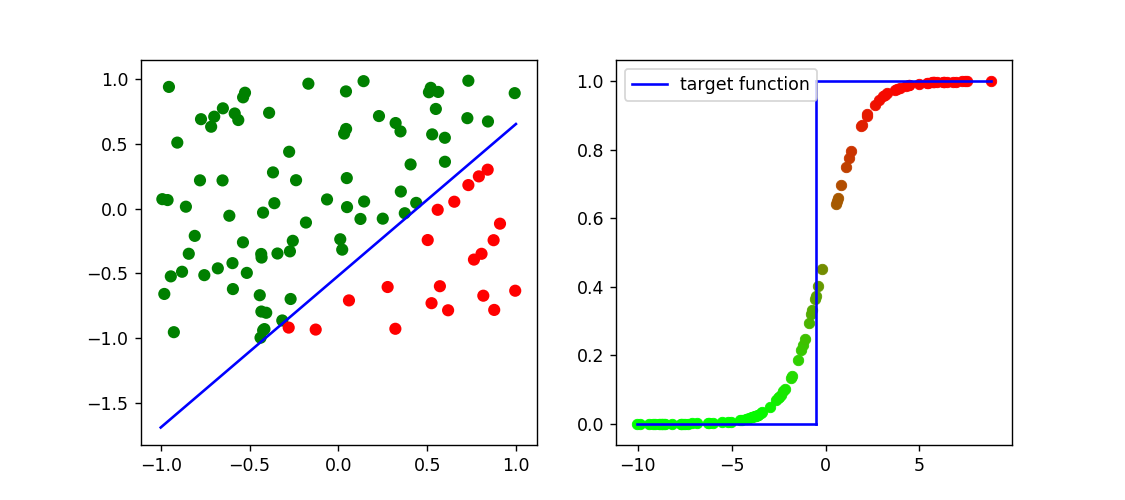

In [13]:
# random_pts = np.random.uniform(-1,1,(2,2))
# w1_f, w0_f = targetFunction(random_pts)
line = np.linspace(-1,1,100)
w1, w0 = targetFunction()
X,Y = generateData(100, w0, w1)

fig, ax = plt.subplots(1, 2, figsize=(9,4))
color = {-1:'red', 1:'green'}
p_color = [color[np.int(i)] for i in Y]
ax[0].plot(line, w1*line + w0, label='target function', color='blue')
ax[0].scatter(X[:,1], X[:,2], color=p_color)
ax[0].relim()
ax[1].relim()
logX, logY = w[-1].dot(X.T), logisticFunction(X, w[-1])
for xl, yl in zip(logX, logY):
    ax[1].scatter(xl, yl, color=[yl, 1-yl,0] , alpha=1, lw=0.5)
ax[1].plot(np.linspace(min(logX),w0,100), [0]*100, color='blue')
ax[1].plot([w0]*100, np.linspace(0,1,100), color='blue')
ax[1].plot(np.linspace(w0,max(logX),100), [1]*100, color='blue', label='target function')

plt.legend(loc='upper left')

plt.show()